In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
in_sample_df = pd.read_csv('Cleaned Datasets/in_sample_cleaned.csv')
out_sample_df = pd.read_csv('Cleaned Datasets/out_sample_cleaned.csv')

In [7]:
print(in_sample_df['PERMNO'].nunique())

50


In [9]:
def summary_stats(dataframe, label):
    desc = dataframe['ExcessReturn'].describe()
    skew = dataframe['ExcessReturn'].skew()
    kurt = dataframe['ExcessReturn'].kurt()

    # Concatenate summary stats with skewness and kurtosis
    stats = pd.concat([desc, pd.Series({'skew': skew, 'kurtosis': kurt})])
    stats.name = label
    return stats

in_stats = summary_stats(in_sample_df, 'In-Sample')
out_stats = summary_stats(out_sample_df, 'Out-of-Sample')

# Combine into a summary table
summary_table = pd.concat([in_stats, out_stats], axis=1)
print(summary_table)


              In-Sample  Out-of-Sample
count     199550.000000  112400.000000
mean           0.000554       0.000532
std            0.024457       0.018552
min           -0.607931      -0.285935
25%           -0.008575      -0.007484
50%            0.000362       0.000740
75%            0.009408       0.008751
max            1.023576       0.292587
skew           1.052029       0.013118
kurtosis      56.561095      18.308605


Descriptive Statistics

In [3]:
# Calculating the overall portfolio adjusted return by year for in-sample data

def calculate_daily_adj_return(dataframe):

    # Converting the date column to datetime format
    dataframe['DlyCalDt'] = pd.to_datetime(dataframe['DlyCalDt'], format='%Y-%m-%d')
    dataframe['Year'] = dataframe['DlyCalDt'].dt.year
    
    # Grouping the data by year and ticker to calculate the total daily excess return
    annual_returns = dataframe.groupby(['Year', 'PERMNO'])['ExcessReturn'].sum().reset_index()
    portfolio_returns = annual_returns.groupby('Year').sum().reset_index() 

    return portfolio_returns, annual_returns


portfolio_returns_in, annual_returns_in = calculate_daily_adj_return(in_sample_df)

portfolio_returns_out, annual_returns_out = calculate_daily_adj_return(out_sample_df)


C:\Users\amaan\AppData\Local\Temp\ipykernel_16512\1628017502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_returns_in.values, y=mean_returns_in.index, palette='coolwarm')


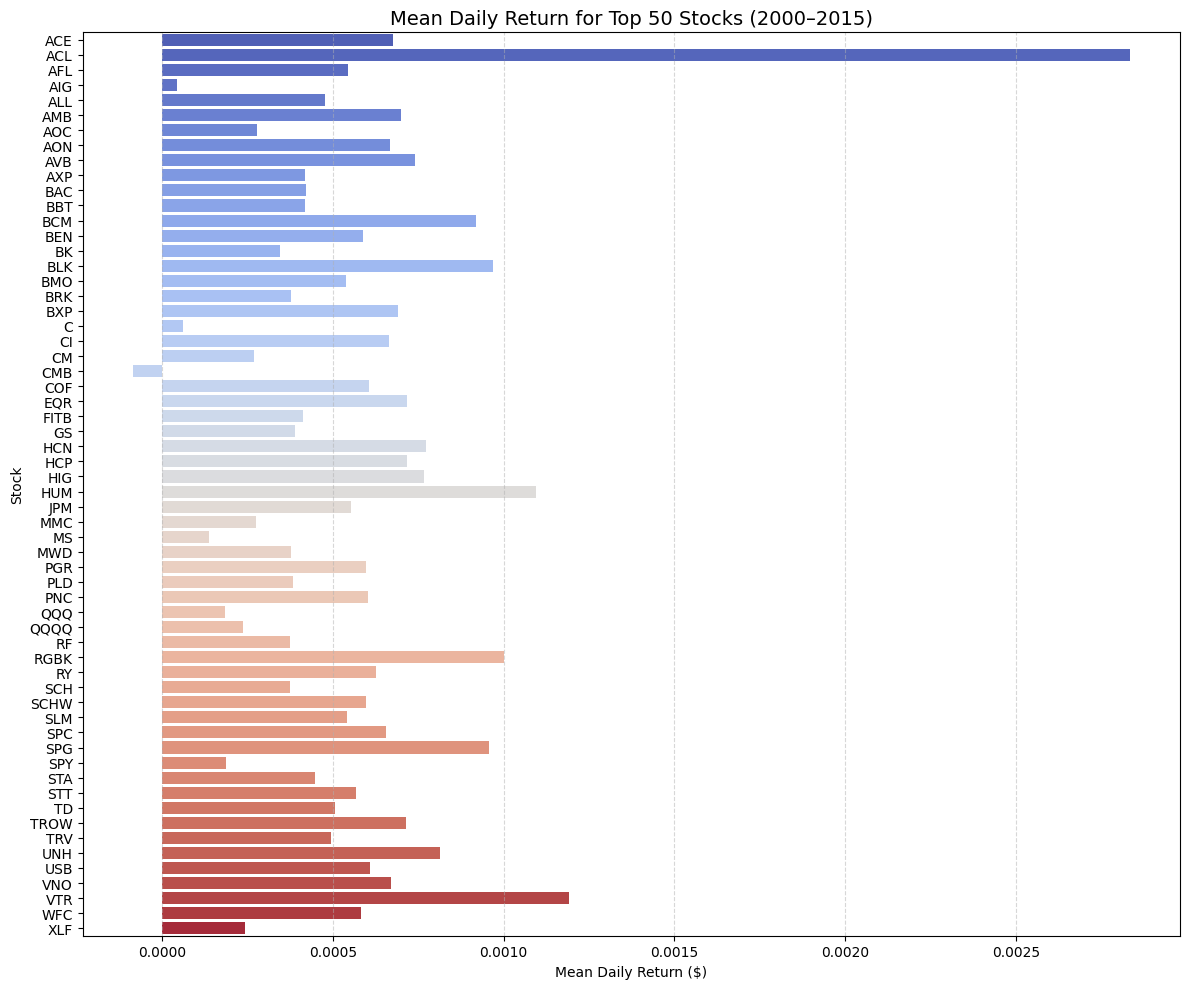

C:\Users\amaan\AppData\Local\Temp\ipykernel_16512\1628017502.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_returns_out.values, y=mean_returns_out.index, palette='coolwarm')


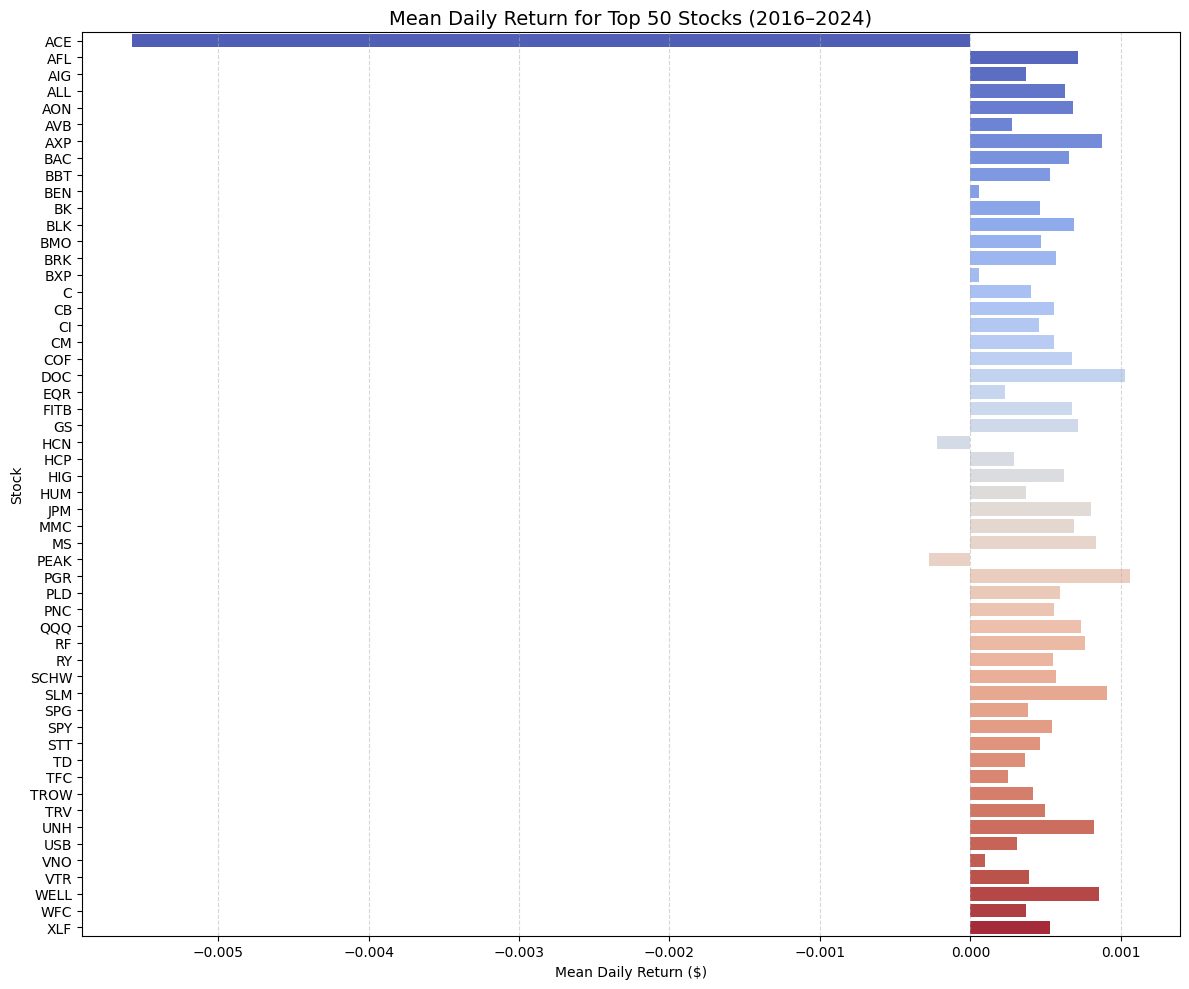

In [4]:
# Mean returns of the top 50 companies
mean_returns_in = in_sample_df.groupby('Ticker')['ExcessReturn'].mean()
mean_returns_out = out_sample_df.groupby('Ticker')['ExcessReturn'].mean()

plt.figure(figsize=(12, 10))
sns.barplot(x=mean_returns_in.values, y=mean_returns_in.index, palette='coolwarm')
plt.title('Mean Daily Return for Top 50 Stocks (2000–2015)', fontsize=14)
plt.xlabel('Mean Daily Return ($)')
plt.ylabel('Stock')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#mean_returns_out = out_sample_df.groupby('Ticker')['ExcessReturn'].mean()

plt.figure(figsize=(12, 10))
sns.barplot(x=mean_returns_out.values, y=mean_returns_out.index, palette='coolwarm')
plt.title('Mean Daily Return for Top 50 Stocks (2016–2024)', fontsize=14)
plt.xlabel('Mean Daily Return ($)')
plt.ylabel('Stock')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


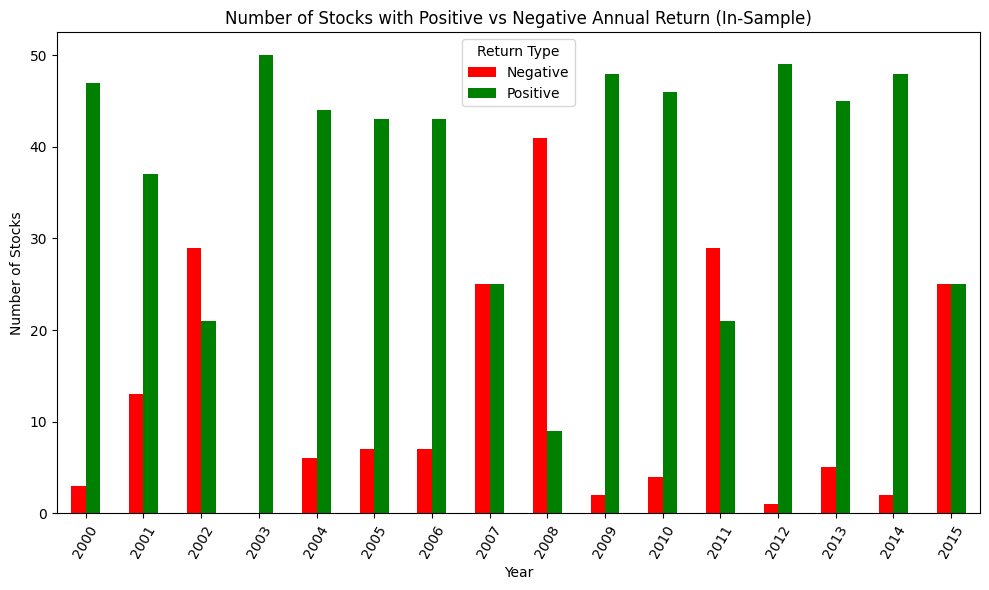

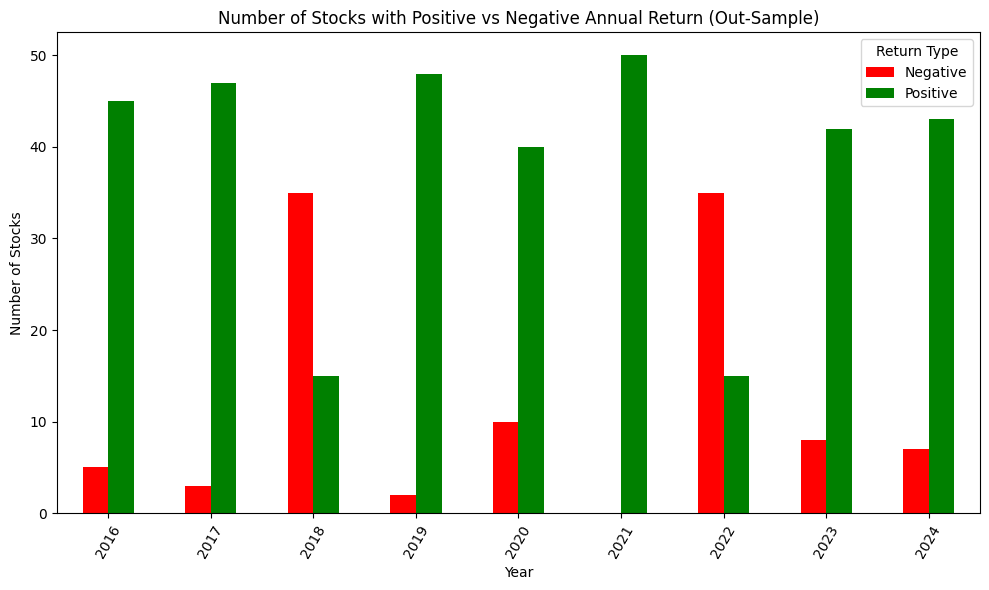

In [5]:
# Distribution of stocks giving annual positive and negative returns for in-sanmple data

# Label as positive or negative return
annual_returns_in['ReturnType'] = np.where(annual_returns_in['ExcessReturn'] >= 0, 'Positive', 'Negative')

# Count number of stocks by return type per year
summary_in = annual_returns_in.groupby(['Year', 'ReturnType'])['PERMNO'].count().unstack()

# Plot the stacked bar chart
summary_in.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'green'])
plt.title('Number of Stocks with Positive vs Negative Annual Return (In-Sample)')
plt.xlabel('Year')
plt.ylabel('Number of Stocks')
plt.legend(title='Return Type')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()   

# Distribution of stocks giving annual positive and negative returns for out-sanmple data

# Label as positive or negative return
annual_returns_out['ReturnType'] = np.where(annual_returns_out['ExcessReturn'] >= 0, 'Positive', 'Negative')

# Count number of stocks by return type per year
summary_out = annual_returns_out.groupby(['Year', 'ReturnType'])['PERMNO'].count().unstack()

# Plot the stacked bar chart
summary_out.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'green'])
plt.title('Number of Stocks with Positive vs Negative Annual Return (Out-Sample)')
plt.xlabel('Year')
plt.ylabel('Number of Stocks')
plt.legend(title='Return Type')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()   

In [6]:
# Calculating Sharpe Ratio for the overall portfolio for both in and out-sample data

def calculate_sharpe_ratio(dataframe):
        
    # Calculate mean and standard deviation of daily returns
    mean_return = dataframe['ExcessReturn'].mean()
    std_dev = dataframe['ExcessReturn'].std()

    # Calculate Sharpe Ratio
    sharpe_ratio = mean_return / std_dev
    
    return (sharpe_ratio * np.sqrt(252))  # Annualize the Sharpe Ratio

portfolio_sharpe_ratio_in = calculate_sharpe_ratio(in_sample_df)
print(f"Portfolio Sharpe Ratio for the market index in the in-sample period: {portfolio_sharpe_ratio_in:.4f}")

portfolio_sharpe_ratio_out = calculate_sharpe_ratio(out_sample_df)
print(f"Portfolio Sharpe Ratio for the market index in theb out-sample period: {portfolio_sharpe_ratio_out:.4f}")

Portfolio Sharpe Ratio for the market index in the in-sample period: 0.3599
Portfolio Sharpe Ratio for the market index in theb out-sample period: 0.4552
